In [6]:
from mpl_toolkits.mplot3d import Axes3D
import logging
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
from math import pow , sqrt, atan2
import math
import pywt
from scipy.signal import find_peaks
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(color_codes=True)
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import manifold, datasets
from scipy.signal import argrelextrema
from scipy.spatial.distance import pdist
from scipy.stats.mstats import pearsonr, spearmanr
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn import metrics
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

# DATA

In [7]:
# the swiss roll
X, color = datasets.make_swiss_roll(n_samples=1500,noise = 0.5)


In [8]:
X

array([[-8.49965741,  7.64095047, -3.56731884],
       [ 5.31476308, 13.01033786, -2.15018344],
       [ 4.0135942 , 16.40195859,  5.61117259],
       ...,
       [ 3.88588536,  2.8178057 , -3.75018242],
       [10.72025842, 19.25977195,  7.47104207],
       [ 4.44861385, 16.1500993 , 13.05187429]])

# LLE FOR VISUALIZATION
without noise

Done. Reconstruction error: 2.98741e-17
Number of neigbor: 3


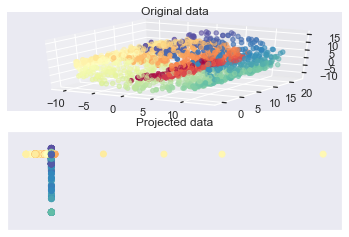

In [9]:
# LLE optimum
NN_LLE,coef = num_neigh(X,2, "standard")

X_r, err = manifold.locally_linear_embedding(X, n_neighbors=NN_LLE,n_components=2)
print("Done. Reconstruction error: %g" % err)
print("Number of neigbor: %g" % NN_LLE)

#----------------------------------------------------------------------
# Plot result

fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

Done. Reconstruction error: 1.08992e-16
Number of neigbor: 4


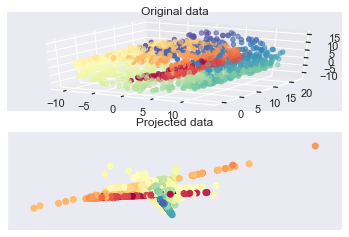

In [10]:
# LLE min

NN_LLE_min = int(round(NN_LLE/2)+2)
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=NN_LLE_min,n_components=2)
print("Done. Reconstruction error: %g" % err)
print("Number of neigbor: %g" % NN_LLE_min)

#----------------------------------------------------------------------
# Plot result

fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

Done. Reconstruction error: 2.24225e-09
Number of neigbor: 8


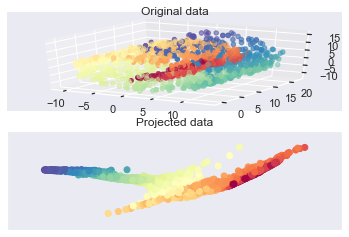

In [11]:
# LLE max

NN_LLE_max = 8
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=NN_LLE_max,n_components=2)
print("Done. Reconstruction error: %g" % err)
print("Number of neigbor: %g" % NN_LLE_max)

#----------------------------------------------------------------------
# Plot result

fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

Done. Reconstruction error: 5.34172e-05
Number of neigbor: 8


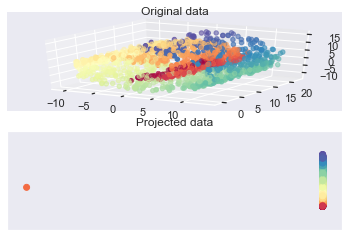

In [12]:
# Hessian Embedding opt
NN_HLLE,coef = num_neigh(X,2, "hessian")
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=NN_HLLE,
                                             n_components=2,method = "hessian",eigen_solver="dense")
print("Done. Reconstruction error: %g" % err)
print("Number of neigbor: %g" % NN_HLLE)

#----------------------------------------------------------------------
# Plot result

fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

Done. Reconstruction error: 0.000903727
Number of neigbor: 16


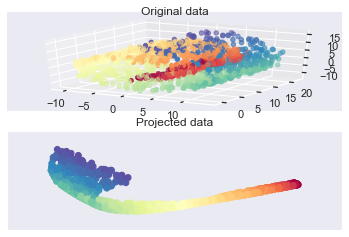

In [13]:
# Hessian Embedding max
NN_HLLE_max = NN_HLLE*2
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=NN_HLLE_max,
                                             n_components=2,method = "hessian",eigen_solver="dense")
print("Done. Reconstruction error: %g" % err)
print("Number of neigbor: %g" % NN_HLLE_max)

#----------------------------------------------------------------------
# Plot result

fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

In [2]:
#----------------------------------------------------------------------
# PCA of the swiss roll

#pca
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)


#----------------------------------------------------------------------
# Plot result

fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()



NameError: name 'PCA' is not defined

In [15]:
# find best number of neighbor
def num_neigh(Data,dim, meth):
    Pears = []
    N_Neigh_Max = 100
    NCOMP       = dim
    if meth == "standard":
        nmin = NCOMP+1
        Vect_N      = np.arange(nmin,N_Neigh_Max,1)
    if meth == "hessian":
        nmin =round(NCOMP*(NCOMP+3)/2)+2
        Vect_N      = np.arange( nmin,N_Neigh_Max,1)
    Tot_Err     = []
    for i in Vect_N:
        _, err = manifold.locally_linear_embedding(Data, n_neighbors=i,n_components=NCOMP,method=meth,eigen_solver="dense")
        Tot_Err.append(err)
    Tot_err = np.array(Tot_Err)
    indices = argrelextrema(Tot_err, np.less)

    if len(indices) < 2:
        best_Ns = np.arange(nmin,nmin*2,1)

    else:
        best_Nspanda = pd.DataFrame(Vect_N[indices])
        best_Ns = (Vect_N[indices])
    for i in best_Ns:
        DataTransfo, err = manifold.locally_linear_embedding(Data, n_neighbors=i,n_components=NCOMP,method = meth,eigen_solver="dense")
        Dx = pdist(DataTransfo, 'euclidean')
        Dy = pdist(Data, 'euclidean')
        Pear, _= pearsonr(Dx, Dy)
        Pears.append(Pear)
    best_N = best_Ns[Pears.index(min(Pears))]
    return best_N,Pears



In [1]:
def residual_variance(X, Y_reduc):
    """
    Input : Data set and embedding
    Output: residual variance
    """
    #pairwise euclidean distance
    Dx = pdist(X, 'euclidean')
    Dy = pdist(Y_reduc, 'euclidean')

    #Pearson correlation
    pxy, _ = pearsonr(Dx, Dy)

    #residual variance
    res_var = 1 - pxy**2
    
    return res_var

def Spearsman_s_Rho (X,Y):
    """
    Input : Data set and embedding
    Output: Spearsman_s_Rho
    """
    
    nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)

    nbrs2 = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(Y)
    distances2, indices2 = nbrs2.kneighbors(Y)

    distances  = np.delete(distances, 0, 1)
    distances2 = np.delete(distances2, 0, 1)
    coef, p = spearmanr(distances, distances2,axis=None)
    return  np.mean(coef)